# **Prophet Intro**

 Es especialmente adecuado para:

- Datos horarios, diarios o semanales con suficientes datos históricos.
- Múltiples modelos estacionales relacionados con el comportamiento humano (día de la semana, estaciones).
- Días festivos importantes con espacios irregulares
- Falta una cantidad razonable de datos.
- Cambios de tendencias históricas.
- Tendencias de crecimiento no lineal con saturación (límites de capacidad, etc.).

Prophet modela series temporales como un modelo aditivo generalizado (GAM) que combina la función de tendencia, la función de estacionalidad, los efectos de las vacaciones y un término de error en un solo modelo:

$$
y(t)= g(t)+ s(t)+h(t)+e_t
$$


- $𝑔(𝑡)$ : tendencia (cambios no periódicos)
- $𝑠(𝑡)$: estacionalidad (cambios periódicos)
- $ℎ(𝑡)$ : efecto vacaciones
- $e_𝑡$: término de error, valor predeterminado anterior 𝜖∼𝑁(0,0.5)

- **Puntos de cambio:** definen los cambios de tendencia. Pueden ser detectados por el propio algoritmo o también pueden ser definidos y ajustados.
  
- **Estacionalidad:** define funciones periódicas que pueden afectar los datos de series temporales. De manera predeterminada, PROPHET considera la estacionalidad anual, semanal y diaria, e intenta identificar tendencias que representen estos efectos periódicos en los datos.
  
- **Feriados:** los días especiales (como feriados u otros eventos recurrentes) también se pueden modelar con el modelo aditivo PROPHET. Las fechas se pueden agregar manualmente a través de un pandas.Dataframe, pero también hay conjuntos de feriados integrados para alrededor de una docena de países.
  
- **Orden de Fourier:** referente a la función de estacionalidad, este valor determina qué tan rápido puede cambiar y adaptarse, y también implica un modelo más ajustado (con el consiguiente riesgo de sobreajuste).
- **Parámetros de tendencia**

| Parámetro                 | Descripción                                                                                      |
|---------------------------|--------------------------------------------------------------------------------------------------|
| `growth`                  | "Linear" o "logistic" se usan para especificar si una tendencia es lineal o logística.           |
| `change points`           | Incluye fechas para posibles puntos de cambio (automático si no se especifica).                  |
| `n_changepoints`          | Si no se proporcionan puntos de cambio, puedes especificar el número de puntos de cambio a incluir automáticamente. |
| `changepoint_prior_scale` | Parámetro para ajustar la flexibilidad de la selección automática de puntos de cambio.           |

- **Estacionalidad y parámetros vacacionales**

| Parámetro               | Descripción                                                                         |
|-------------------------|-------------------------------------------------------------------------------------|
| `annual_seasonality`    | Para ajustar la estacionalidad anual.                                               |
| `weekly_seasonality`    | Para ajustar la estacionalidad semanal.                                             |
| `daily_seasonality`     | Ajusta la estacionalidad diaria.                                                    |
| `holidays`              | DataFrame de eventos que contiene el nombre y la fecha del día festivo.             |
| `season_prior_scale`    | Parámetro para ajustar la fuerza del modelo de estacionalidad.                      |
| `holiday_prior_scale`   | Parámetro para ajustar la fuerza del modelo de días festivos.                       |


- **Puntos de cambio de tendencia**
La tendencia de una serie temporal puede cambiar abruptamente. PROPHET intenta detectar estos cambios automáticamente mediante un laplaciano o un exponencial doble a priori. De manera predeterminada, los puntos de cambio solo se ajustan para el primer 80 % de la serie temporal, lo que permite un margen suficiente para la previsión real.

Para ajustar los cambios de tendencia, podemos usar el parámetro `changepoint_prior_scale`, que está configurado en 0,05 de forma predeterminada. Aumentar su valor haría que la tendencia fuera más flexible y reduciría el desajuste.

Establezcamos el valor en 0,5, como sugiere la guía de documentación de Prophet. Si queremos generar intervalos de incertidumbre para los componentes de tendencia y estacionalidad, debemos realizar un muestreo bayesiano completo, lo que se puede hacer utilizando el mcmc_samplesparámetro en Prophet.


Prophet es una biblioteca de pronóstico de series temporales de Python desarrollada por Facebook. Prophet detecta automáticamente la estacionalidad anual, semanal y diaria. Puede descomponer rápidamente los efectos de tendencia y estacionalidad.


- ¿Cómo entrenar un modelo de pronóstico de series de tiempo usando Prophet?
- ¿Cómo hacer predicciones y descomposición de series temporales?
- ¿Cómo identificar puntos de cambio en la tendencia?
- ¿Cómo hacer una validación cruzada de series temporales?
- ¿Cómo evaluar el rendimiento del modelo de series de tiempo usando Prophet?

### Paso 1: instalar e importar bibliotecas

In [ ]:
#%pip install yfinance prophet


  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.48
    Uninstalling yfinance-0.2.48:
      Successfully uninstalled yfinance-0.2.48
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd


import yfinance as yf

# Prophet
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics

# VisualizaCION
import plotly.graph_objs as go

# Paso 2: obtenga datos

El índice Standard & Poor's 500 (Standard & Poor's 500 Index), también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se le considera el índice más representativo de la situación real del mercado.3

El índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80 % de toda la capitalización de mercado en Estados Unidos. Los componentes del índice S&P 500 y su ponderación son determinados por S&P Dow Jones Indices.

Es uno de los índices de valores más seguidos, y muchas personas lo consideran el más representativo del mercado de acciones de Estados Unidos, y el marcador de tendencias de la economía norteamericana.​ El National Bureau of Economic Research ha clasificado a las acciones comunes como un indicador relevante de los ciclos de negocios.4​

Yahoo Finance descarga datos con la fecha como índice. Usando reset_index, creamos un nuevo índice y usamos la fecha como columna. Esto se debe a que Prophet requiere que la variable de fecha y hora sea una columna para la entrada del modelo.

De forma predeterminada, la fecha es un tipo de cadena, pd.to_datetimela cambia a un formato DateTime.

In [58]:
# Fecha Inicio datos
start_date = '2022-01-01'

# Fecha fin de los dato
end_date = '2025-03-01'

In [59]:
# Descargar los datos
ticker_list = [ "^GSPC"]
data = yf.download(ticker_list, start=start_date, end=end_date)
data


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2022-01-03,4796.560059,4796.640137,4758.169922,4778.140137,3831020000
2022-01-04,4793.540039,4818.620117,4774.270020,4804.509766,4683170000
2022-01-05,4700.580078,4797.700195,4699.439941,4787.990234,4887960000
2022-01-06,4696.049805,4725.009766,4671.259766,4693.390137,4295280000
2022-01-07,4677.029785,4707.950195,4662.740234,4697.660156,4181510000
...,...,...,...,...,...
2025-02-24,5983.250000,6043.649902,5977.830078,6026.689941,4990120000
2025-02-25,5955.250000,5992.649902,5908.490234,5982.729980,5374690000


In [60]:
# Restablecer el índice y tener la fecha como columna
data.reset_index(inplace=True)

# Cambiar la fecha al formato de fecha y hora
data['Date'] = pd.to_datetime(data['Date'])


data

Price,Date,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
0,2022-01-03,4796.560059,4796.640137,4758.169922,4778.140137,3831020000
1,2022-01-04,4793.540039,4818.620117,4774.270020,4804.509766,4683170000
2,2022-01-05,4700.580078,4797.700195,4699.439941,4787.990234,4887960000
3,2022-01-06,4696.049805,4725.009766,4671.259766,4693.390137,4295280000
4,2022-01-07,4677.029785,4707.950195,4662.740234,4697.660156,4181510000
...,...,...,...,...,...,...
787,2025-02-24,5983.250000,6043.649902,5977.830078,6026.689941,4990120000
788,2025-02-25,5955.250000,5992.649902,5908.490234,5982.729980,5374690000
789,2025-02-26,5956.060059,6009.819824,5932.689941,5970.870117,4869580000


In [61]:
data.columns

MultiIndex([(  'Date',      ''),
            ( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [62]:
# borrar nivel superior columna
data.columns = data.columns.droplevel(1)
data.head()

Price,Date,Close,High,Low,Open,Volume
0,2022-01-03,4796.560059,4796.640137,4758.169922,4778.140137,3831020000
1,2022-01-04,4793.540039,4818.620117,4774.270020,4804.509766,4683170000
2,2022-01-05,4700.580078,4797.700195,4699.439941,4787.990234,4887960000
3,2022-01-06,4696.049805,4725.009766,4671.259766,4693.390137,4295280000
4,2022-01-07,4677.029785,4707.950195,4662.740234,4697.660156,4181510000


In [64]:
# Declarar la figura
fig = go.Figure()

fig.add_trace(go.Candlestick(x=data.Date,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name = 'S&P 500'))

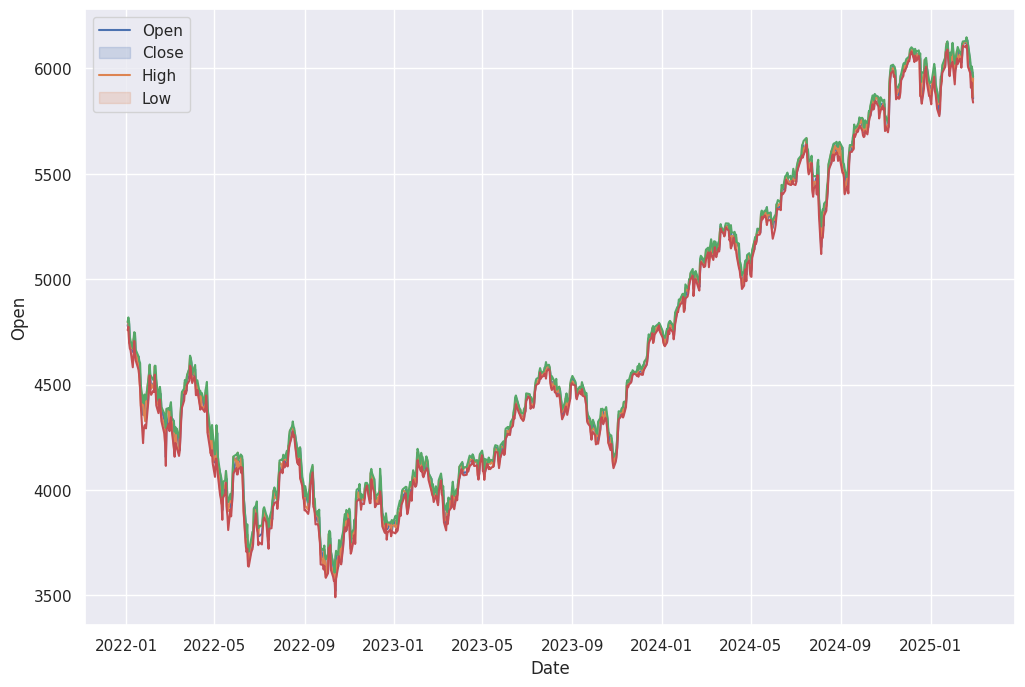

In [65]:
# Visualize data using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12,8)})
sns.lineplot(x=data.Date, y=data['Open'])
sns.lineplot(x=data.Date, y=data['Close'])
sns.lineplot(x=data.Date, y=data['High'])
sns.lineplot(x=data.Date, y=data['Low'])
plt.legend(labels = ['Open', 'Close', 'High', 'Low'])

**objetivo**  pronosticar el precio de cierre de Bitcoin. Prophet toma dos columnas como entradas, una columna de fecha y hora llamada "ds" y una columna de valor llamada "y". Por lo tanto, debemos eliminar todas las demás columnas, cambiar el nombre de "Fecha" a "ds" y "Cerrar" a "y".


In [66]:
# # Mantener solo la fecha y el precio de cierre
df = data.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

# Cambiar el nombre de la fecha a ds y cerrar el precio a y
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

df

Price,ds,y
0,2022-01-03,4796.560059
1,2022-01-04,4793.540039
2,2022-01-05,4700.580078
3,2022-01-06,4696.049805
4,2022-01-07,4677.029785
...,...,...
787,2025-02-24,5983.250000
788,2025-02-25,5955.250000
789,2025-02-26,5956.060059
790,2025-02-27,5861.569824


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      792 non-null    datetime64[ns]
 1   y       792 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.5 KB


In [68]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Price,,,,,,,,
ds,792,2023-07-31 13:58:10.909091072,2022-01-03 00:00:00,2022-10-16 06:00:00,2023-08-01 12:00:00,2024-05-14 06:00:00,2025-02-28 00:00:00,NaN
y,792.0,4674.116454,3577.030029,4108.839966,4461.540039,5242.089844,6144.149902,713.596221


# Paso 3: Train Test Split

crear un conjunto de datos de entrenamiento y de prueba. No podemos utilizar la división aleatoria para los datos de series temporales porque provoca una fuga de datos de fechas futuras a fechas pasadas. Por lo general, se selecciona una fecha límite. Los datos anteriores a la fecha límite son el conjunto de datos de entrenamiento y los datos posteriores a la fecha límite se utilizan como conjunto de datos de prueba.



In [75]:
# Train test split
df_train = df[df['ds']<='2025-01-31']
df_test = df[df['ds']>'2025-01-31']

# Print .
print('El conjunto de datos de entrenamiento tiene', len(df_train), 'que, van desde', df_train['ds'].min(), 'hasta', df_train['ds'].max())
print(' El conjunto de datos de prueba tiene', len(df_test), 'que, van desde', df_test['ds'].min(), 'hasta', df_test['ds'].max())

El conjunto de datos de entrenamiento tiene 773 que, van desde 2022-01-03 00:00:00 hasta 2025-01-31 00:00:00
 El conjunto de datos de prueba tiene 19 que, van desde 2025-02-03 00:00:00 hasta 2025-02-28 00:00:00


In [76]:
df_test

Price,ds,y
773,2025-02-03,5994.569824
774,2025-02-04,6037.879883
775,2025-02-05,6061.479980
776,2025-02-06,6083.569824
777,2025-02-07,6025.990234
778,2025-02-10,6066.439941
779,2025-02-11,6068.500000
780,2025-02-12,6051.970215
781,2025-02-13,6115.069824
782,2025-02-14,6114.629883


## Paso 4: Entrene el modelo de series temporales con Prophet


Entrenar el modelo de series de tiempo utilizando el conjunto de datos de entrenamiento.

- `interval_width` especifica el intervalo de predicción. Cambiamos el valor predeterminado del intervalo de predicción del 80% al 95%. Hace que el límite superior y el límite inferior de la predicción sean más amplios.

- `n_changepoints` es el número de puntos de cambio en la tendencia de la serie temporal. El valor predeterminado es 25. Según la forma de los datos del precio de Bitcoin, se estableció en 7.

In [77]:
# Crea el modelo con una confianza interna del 95%
m = Prophet(growth="linear", weekly_seasonality=True, daily_seasonality=True)

# Ajusta el modelo
m.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp1uwrdtub/81d5jryr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1uwrdtub/e2aij08c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58583', 'data', 'file=/tmp/tmp1uwrdtub/81d5jryr.json', 'init=/tmp/tmp1uwrdtub/e2aij08c.json', 'output', 'file=/tmp/tmp1uwrdtub/prophet_model9vlgzswq/prophet_model-20250315032611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:26:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:26:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


La estacionalidad anual y la estacionalidad diaria se desactivan automáticamente. Esto se debe a que Prophet detecta que el conjunto de datos que estamos utilizando no tiene varios años completos de datos y no tiene unidades menores a un día

# Paso 5: utilice el modelo Prophet para hacer predicciones


El paso 5 utiliza el modelo Profeta entrenado para hacer la predicción. Usamos los últimos 31 días para crear el marco de datos futuro. Esto es lo mismo que usar el conjunto de datos de prueba que creamos anteriormente.

El resultado de la predicción contiene mucha información. Mantuvimos el valor predicho yhaty su valor límite superior e inferior del intervalo de predicción.

In [80]:
# Crear un marco de datos futuro para la predicción
future = m.make_future_dataframe(periods=28)

# Pronosticar los valores futuros del marco de datos
forecast = m.predict(future)

# Verifique los valores pronosticados y el pronóstico del límite
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-03,4615.286017,4486.469985,4749.267922
1,2022-01-04,4609.048987,4478.646732,4737.833497
2,2022-01-05,4603.894527,4467.298309,4747.496656
3,2022-01-06,4598.495054,4468.128901,4728.706520
4,2022-01-07,4595.395896,4467.876766,4723.970556
...,...,...,...,...
796,2025-02-24,6183.964359,6054.359870,6307.224667
797,2025-02-25,6177.829463,6055.802981,6314.116038
798,2025-02-26,6173.149015,6042.084832,6307.248848
799,2025-02-27,6168.745712,6031.612152,6299.239712


El eje x es la fecha en la visualización del pronóstico y el eje y es el precio de cierre de Bitcoin. Los puntos negros son los precios reales en el conjunto de datos de entrenamiento y los puntos rojos son los precios reales previstos. La línea azul es la predicción del modelo de series temporales. El área sombreada es el intervalo de predicción del 95%

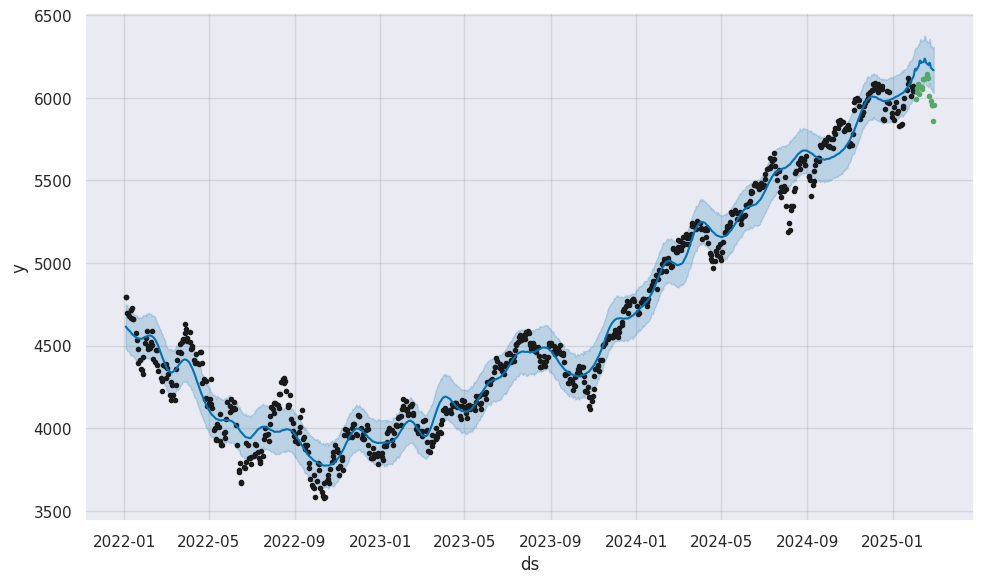

In [81]:
# Visualizar el pronostico
fig = m.plot(forecast)
ax = fig.gca()
ax.plot( df_test["ds"], df_test["y"], 'g.')

# Paso 6: Descomposición de series temporales



En el paso 6, descompondremos el pronóstico de la serie temporal.

-
-

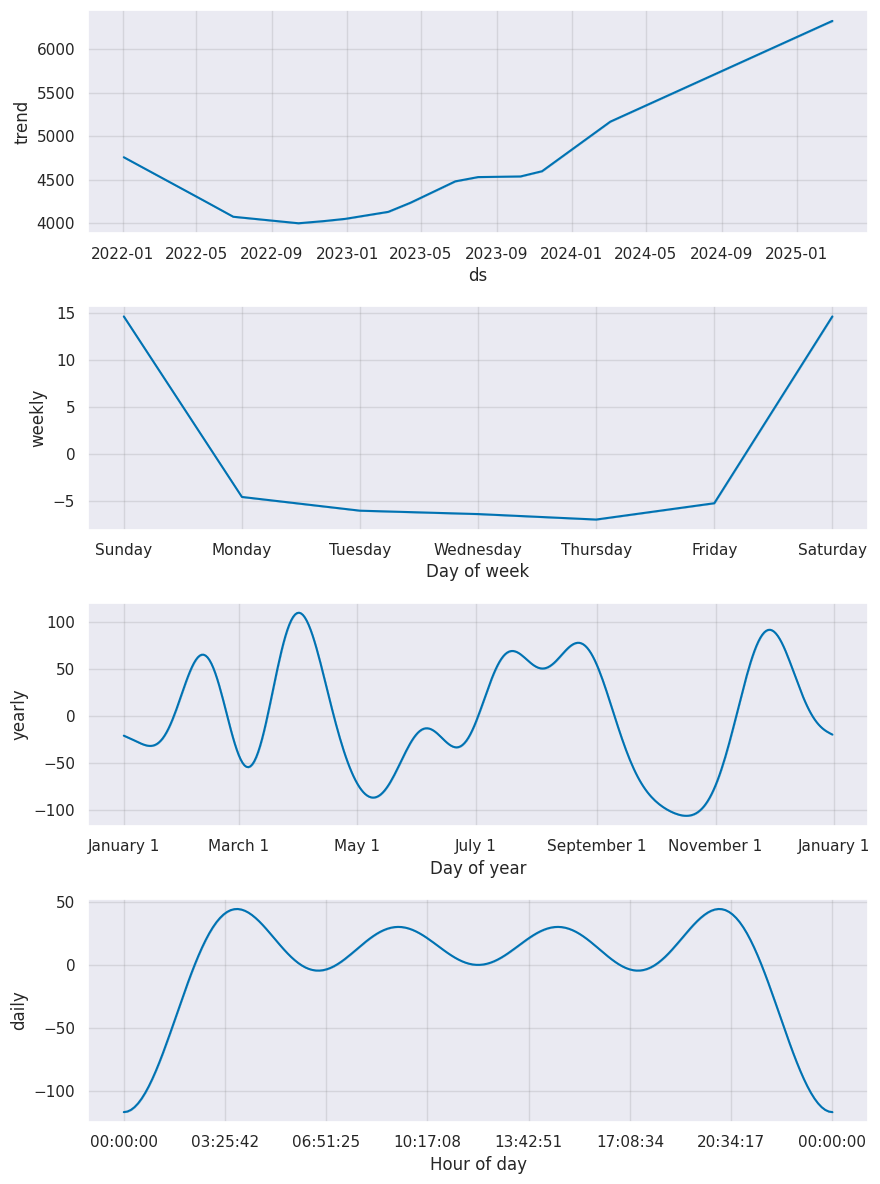

In [82]:
# Visualizar las componentes
m.plot_components(forecast);

# Paso 7: identificar los puntos de cambio


identificar los puntos de cambio en la tendencia de la serie temporal.

Prophet identifica automáticamente los puntos de cambio en los datos de series temporales siguiendo los pasos a continuación:

- Utilice los datos del primer 80% de la serie temporal para identificar puntos de cambio. El valor predeterminado es 80% pero es un hiperparámetro que podemos cambiar.
- Identificar un gran número de fechas distribuidas uniformemente con posibles cambios de trayectoria.
- Aplique un previo escaso a las magnitudes de la tasa de cambio, que es similar a la regularización L1.
Podemos listar las fechas correspondientes a los puntos de cambio usando `.changepoints`.


In [83]:
# Puntos de cambio predeterminados
print(f'Hay {len(m.changepoints)} puntos de Cambio.  \n{df.loc[df["ds"].isin(m.changepoints)]}')

Hay 25 puntos de Cambio.  
Price         ds            y
25    2022-02-08  4521.540039
49    2022-03-15  4262.450195
74    2022-04-20  4459.450195
99    2022-05-25  3978.729980
123   2022-06-30  3785.379883
148   2022-08-05  4145.189941
173   2022-09-12  4110.410156
197   2022-10-14  3583.070068
222   2022-11-18  3965.340088
247   2022-12-27  3829.250000
271   2023-02-01  4119.209961
296   2023-03-09  3918.320068
321   2023-04-14  4137.640137
346   2023-05-19  4191.979980
370   2023-06-26  4328.819824
395   2023-08-01  4576.729980
420   2023-09-06  4465.479980
444   2023-10-10  4358.240234
469   2023-11-14  4495.700195
494   2023-12-20  4698.350098
518   2024-01-26  4890.970215
543   2024-03-04  5130.950195
568   2024-04-09  5209.910156
592   2024-05-13  5221.419922
617   2024-06-18  5487.029785


En la visualización, las líneas de puntos rojas representan los puntos de cambio. Sólo se incluyen los que tienen más cambios.

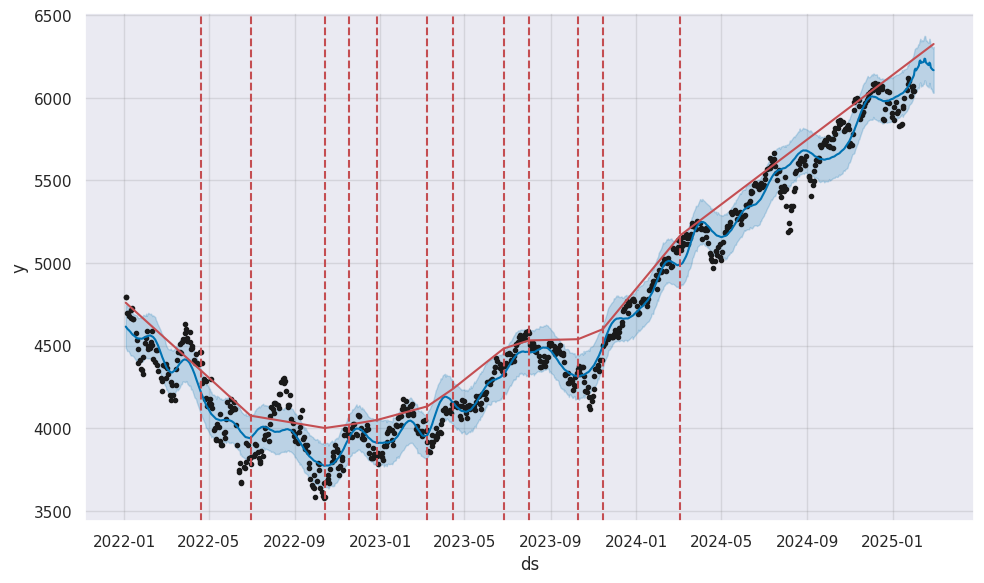

In [84]:

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Paso 8: validación cruzada


En el paso 8, realizar una validación cruzada del modelo de series de tiempo. Prophet tiene una cross_validation función para automatizar la comparación entre los valores reales y previstos.

- $m$ es el modelo entrenado.
- initial='500 days' significa que el modelo inicial se entrenará en los primeros 500 días de datos.
- period='60 days' significa que se agregarán 60 días al conjunto de datos de entrenamiento para cada modelo adicional.
- horizon = '30 days'significa que el modelo pronostica los próximos 30 días. Cuando horizonse proporciona solo, el valor predeterminado de Prophet initiales el triple de horizon, y period la mitad de horizon.
- parallel="processes"permite el procesamiento paralelo para la validación cruzada. Cuando la validación cruzada paralela se pueda realizar en una sola máquina, processesproporcione el mayor rendimiento. Para problemas más grandes, daskse puede utilizar para realizar una validación cruzada en varias máquinas.




In [86]:
# Cross validation
df_cv = cross_validation(m, initial='730 days', period='90 days', horizon = '30 days', parallel="processes")
df_cv

INFO:prophet:Making 5 forecasts with cutoffs between 2024-01-07 00:00:00 and 2025-01-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fd00be15110>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1uwrdtub/078wng3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1uwrdtub/k0sn37d_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1uwrdtub/lrw44srv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1uwrdtub/i2zsq88p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17903', 'data', 'file=/tmp/tmp1uwrdtub/078wng3f.json', 'init=/tmp/tmp1uwrdtub/lrw44srv.json', 'output', 'file=/tmp/tmp1uwrdtub/prophet_model8orxlv3f/prophet_model-20250315033245.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:CmdStan args:

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-08,4729.999104,4621.964729,4849.867888,4763.540039,2024-01-07
1,2024-01-09,4726.982563,4607.940682,4839.072690,4756.500000,2024-01-07
2,2024-01-10,4726.247499,4610.985407,4829.660787,4783.450195,2024-01-07
3,2024-01-11,4722.488612,4612.494603,4827.902703,4780.240234,2024-01-07
4,2024-01-12,4723.458609,4611.359382,4840.013648,4783.830078,2024-01-07
...,...,...,...,...,...,...
98,2025-01-27,6280.699003,6139.913069,6405.900844,6012.279785,2025-01-01
99,2025-01-28,6286.285709,6158.753215,6423.927822,6067.700195,2025-01-01
100,2025-01-29,6294.488700,6162.381430,6427.235734,6039.310059,2025-01-01
101,2025-01-30,6301.854860,6166.033500,6435.353790,6071.169922,2025-01-01


# Paso 9: Evaluación del desempeño del modelo Prophet


El paso 9 evalúa el desempeño del modelo de validación cruzada.

- MSE (Error cuadrático medio) resume la diferencia al cuadrado entre lo real y la predicción y se divide por el número de predicciones.
- RMSE (error cuadrático medio) toma la raíz cuadrada de MSE.
- MAE (error absoluto medio) resume la diferencia absoluta entre lo real y la predicción y se divide por el número de predicciones.
- MAPE (Error porcentual absoluto medio) resume la diferencia porcentual absoluta entre lo real y la predicción y se divide por el número de predicciones. MAPE es independiente de la magnitud de los datos, por lo que puede usarse para comparar diferentes pronósticos. Pero no está definido cuando el valor real es cero.
- MDAPE (Error porcentual absoluto medio) es similar a MAPE. La diferencia es que calcula la mediana en lugar de tomar el promedio de la diferencia porcentual absoluta.
- SMAPE (Error porcentual absoluto medio simétrico) es similar a MAPE. La diferencia es que al calcular el error porcentual absoluto, el denominador es el valor real de MAPE y el promedio del valor real y previsto de SMAPE.

In [87]:
df_p = performance_metrics(df_cv)
df_p


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,17151.140611,130.962363,113.143835,0.021131,0.020435,0.020994,0.500000
1,5 days,22684.073600,150.612329,133.993147,0.024574,0.029844,0.024569,0.466667
2,6 days,37187.848882,192.841512,172.162461,0.030944,0.031739,0.030881,0.350000
3,7 days,44519.202887,210.995741,189.088003,0.033419,0.042849,0.033389,0.320000
4,8 days,51940.420522,227.904411,205.775520,0.036171,0.043220,0.036293,0.280000
5,9 days,64626.497670,254.217422,227.321327,0.040490,0.048915,0.040248,0.275000
6,10 days,59392.961809,243.706713,203.198109,0.036874,0.045940,0.036491,0.400000
7,11 days,61233.657034,247.454353,197.050544,0.037018,0.037683,0.036415,0.500000
8,12 days,69294.304525,263.238114,218.124367,0.040435,0.040121,0.040079,0.366667
9,13 days,88505.711354,297.499095,261.265651,0.047851,0.057668,0.047241,0.250000


`plot_cross_validation_metric` El método de Prophet nos ayuda a trazar los resultados del rendimiento de la validación cruzada.

- El eje $x$ es el horizonte. Como establecimos el horizonte en 30 días, el eje x tiene un valor de hasta 30.
- El eje y es la métrica que nos interesa. La utilizamos mapecomo ejemplo en esta visualización.
- Cada día podemos ver tres puntos. Esto se debe a que hay tres modelos en la validación cruzada y cada punto representa el MAPE de un modelo.
- La línea es el rendimiento agregado de todos los modelos. Podemos ver que el valor MAPE aumenta con los días, lo cual es de esperarse porque las series de tiempo tienden a hacer mejores predicciones para el futuro cercano que para el futuro lejano.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



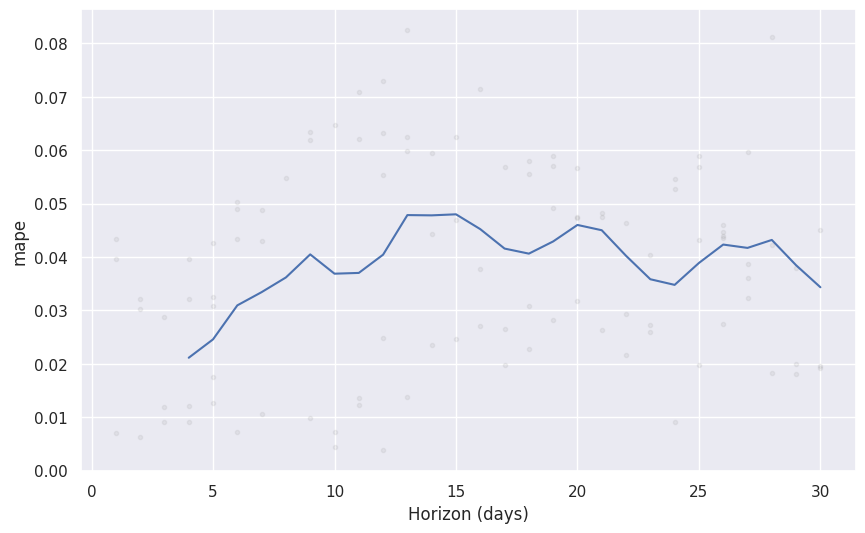

In [89]:
# Visualizar las metricas
fig = plot_cross_validation_metric(df_cv, metric='mape')

# Reference

* [Prophet documentation](https://facebook.github.io/prophet/docs/quick_start.html)
* [Prophet cross-validation and hyperparameter tuning](https://facebook.github.io/prophet/docs/diagnostics.html)
* [Prophet change point detection](https://facebook.github.io/prophet/docs/trend_changepoints.html)
